In [1]:
#Importando bibliotecas fundamentais para análise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lendo arquivo CSV bank.csv
bank = pd.read_csv('bank-full.csv',sep=";")

In [3]:
#Determinando número de linhas e colunas do DataFrame
linhas = bank.shape[0]
colunas = bank.shape[1]
print("Linhas: {} Colunas {}".format(linhas,colunas))

Linhas: 45211 Colunas 17


In [4]:
#Determinando nomes das colunas
nome_colunas = bank.columns.values
print(nome_colunas)

['age' 'job' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'contact' 'day' 'month' 'duration' 'campaign' 'pdays' 'previous'
 'poutcome' 'y']


In [5]:
#Determinando o tipo de váriavel das colunas
tipo_var_colunas = bank.dtypes
print(tipo_var_colunas)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [6]:
#Verificando se existem NaNs no dataframe
n_nans = bank[bank.isna()].count()
print(n_nans)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [7]:
#Exibindo informações sobre o dado
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [8]:
#Exibindo cinco primeiras linhas
print(bank.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


Criando um novo DataFrame apenas com informações sobre os clientes

In [9]:
coluna_clientes = ["age","job","marital","education","default","housing","loan","y"]
clientes = bank[coluna_clientes]
print(clientes.head())

   age           job  marital  education default housing loan   y
0   58    management  married   tertiary      no     yes   no  no
1   44    technician   single  secondary      no     yes   no  no
2   33  entrepreneur  married  secondary      no     yes  yes  no
3   47   blue-collar  married    unknown      no     yes   no  no
4   33       unknown   single    unknown      no      no   no  no


Vamos agora analisar as variáves categóricas para determinar se eles possuem informações relevantes para a análise do problema

In [11]:
#Determinando as profissões
jobs = clientes['job'].unique()
print(jobs)

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [12]:
#Determinando os estados civis possiveis dos clientes
estado_civil = clientes['marital'].unique()
print(estado_civil)

['married' 'single' 'divorced']


In [13]:
#Determinando o grau de estudo dos clientes
educacao = clientes['education'].unique()
print(educacao)

['tertiary' 'secondary' 'unknown' 'primary']


In [14]:
#Determinando as possibilidades para saber se o cliente tem crédito ou não
credito = clientes['default'].unique()
print(credito)

['no' 'yes']


In [15]:
#Determinando as possibilidades para saber se o cliente tem casa ou não
credito = clientes['housing'].unique()
print(credito)

['yes' 'no']


In [16]:
#Determinando as possibilidades para saber se o cliente tem empréstimo pessoal ou não
loan = clientes['loan'].unique()
print(loan)

['no' 'yes']


Estudando a distribuição de idades

In [17]:
idade = clientes['age']
idade_min = idade.min()
idade_max = idade.max()
idade_mean = idade.mean()
idade_std = idade.std()
print("Idade miníma {:0.0f}".format(idade_min))
print("Idade máxima {:0.0f}".format(idade_max))
print("Idade média {:0.1f}".format(idade_mean))
print("Desvio padrão da idade {:0.1f}".format(idade_std))

Idade miníma 18
Idade máxima 95
Idade média 40.9
Desvio padrão da idade 10.6


Graficando a distribuição de idades

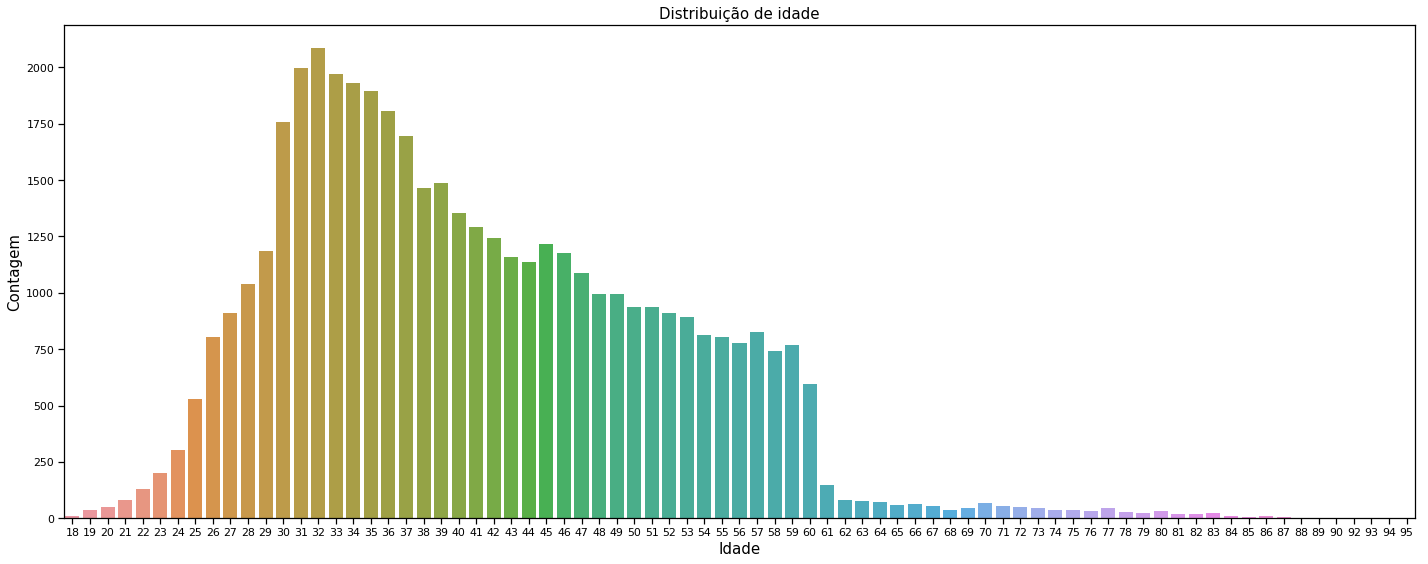

In [18]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = clientes)
ax.set_xlabel('Idade', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição de idade', fontsize=15)
plt.tight_layout()

Box plot da distribuição de idades para localizarmos outliers

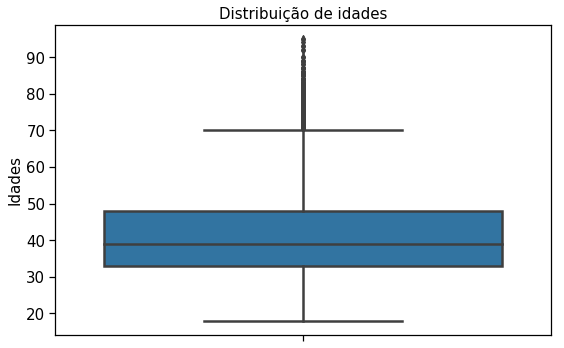

In [19]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.boxplot(x = 'age', data = clientes, orient = 'v', ax = ax)
ax.set_ylabel('Idades', fontsize=15)
ax.set_title('Distribuição de idades', fontsize=15)
ax.tick_params(labelsize=15)
plt.tight_layout() 

Determinando valores dos quartis para detectarmos a partir de qual idade temos outliers

In [20]:
q1 = clientes['age'].quantile(q = 0.25)
q2 = clientes['age'].quantile(q = 0.50)
q3 = clientes['age'].quantile(q = 0.75)
q4 = clientes['age'].quantile(q = 1.00)
outliers = q3 + 1.5*(q3-q1)
print("Primeiro quartil = {:0.1f}".format(q1))
print("Segundo quartil = {:0.1f}".format(q2))
print("Terceiro quartil = {:0.1f}".format(q3))
print("Quarto quartil = {:0.1f}".format(q4))
print("Outliers = {:0.1f}".format(outliers))

Primeiro quartil = 33.0
Segundo quartil = 39.0
Terceiro quartil = 48.0
Quarto quartil = 95.0
Outliers = 70.5


Idades acima de 73 anos são outliers

In [21]:
num_outliers = clientes[clientes['age'] > outliers]['age'].count()
print("Numero de outliers = {:0.0f}".format(num_outliers))
perc_num_outliers = 100.0*num_outliers/len(clientes)
print("Numero de outliers = {:0.2f} %".format(perc_num_outliers))

Numero de outliers = 487
Numero de outliers = 1.08 %


Graficando a distribuição de profissões

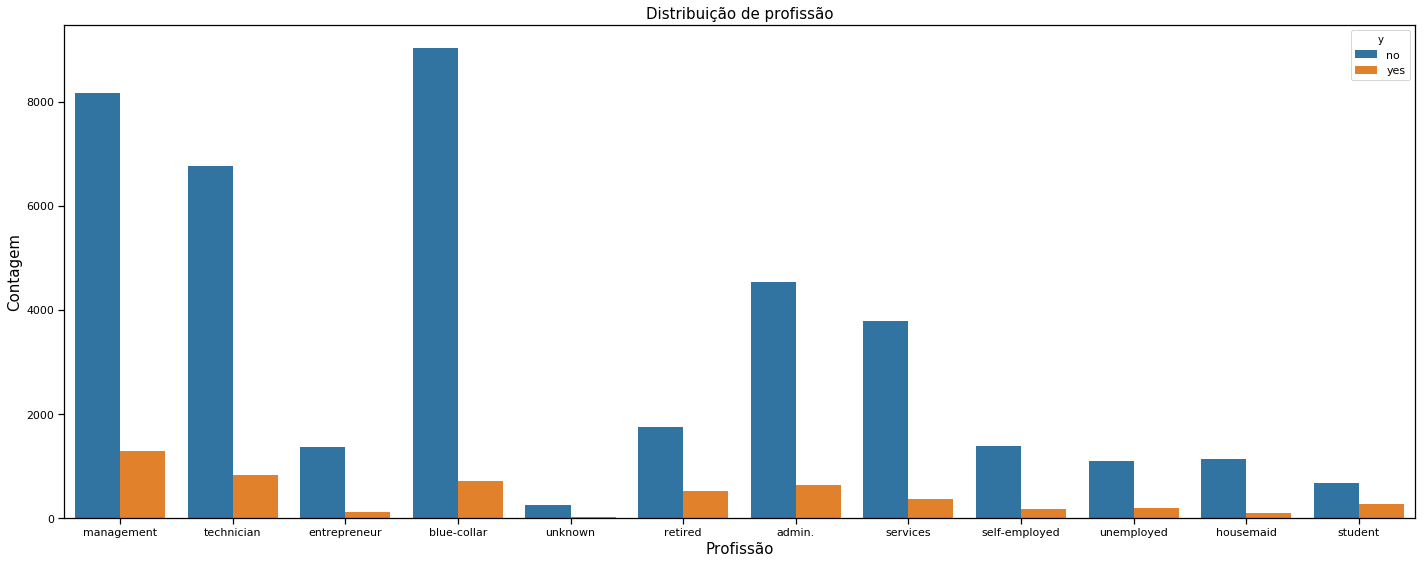

In [22]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = clientes, hue='y')
ax.set_xlabel('Profissão', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição de profissão', fontsize=15)
plt.tight_layout()

Analisando o estado civil dos clientes

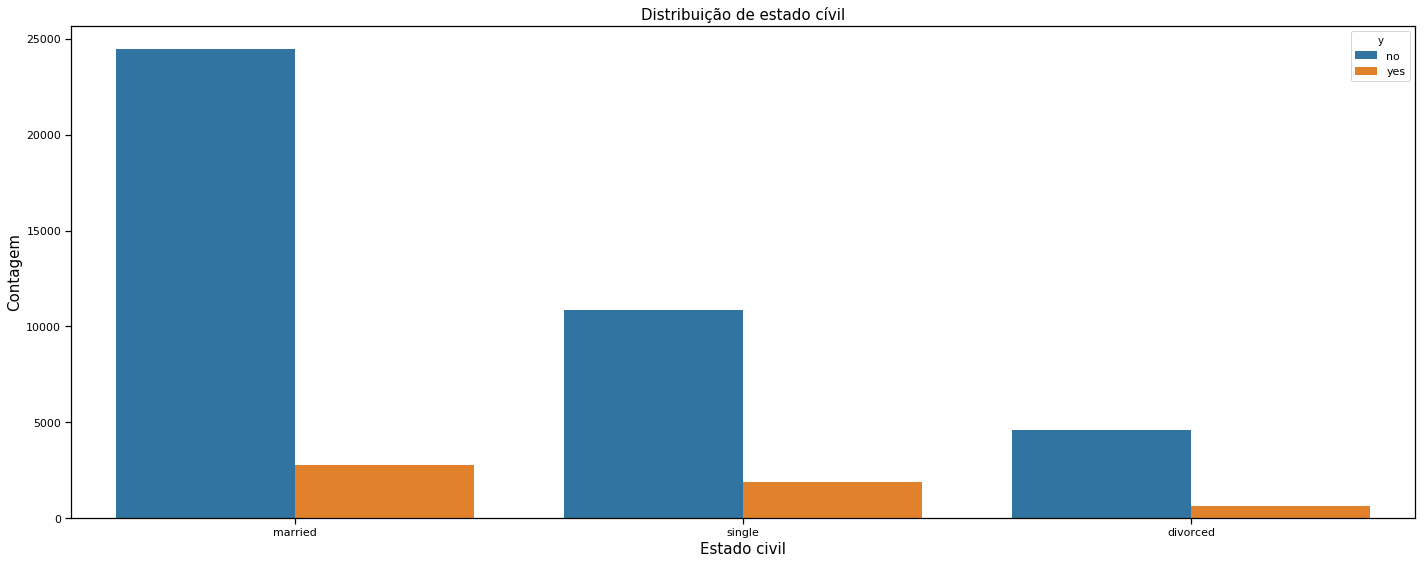

In [23]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'marital', data = clientes, hue='y')
ax.set_xlabel('Estado civil', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição de estado cívil', fontsize=15)
plt.tight_layout()

Analisando a distribuição de educação

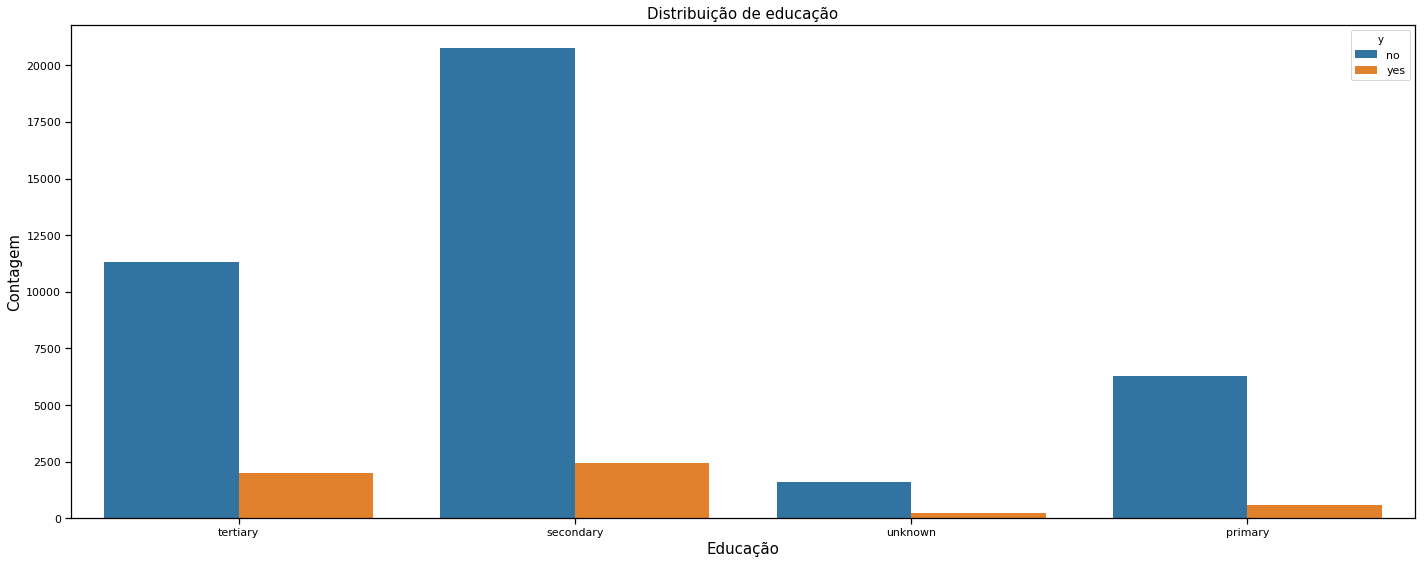

In [24]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'education', data = clientes, hue='y')
ax.set_xlabel('Educação', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição de educação', fontsize=15)
plt.tight_layout()

Analisando o perfil de crédito

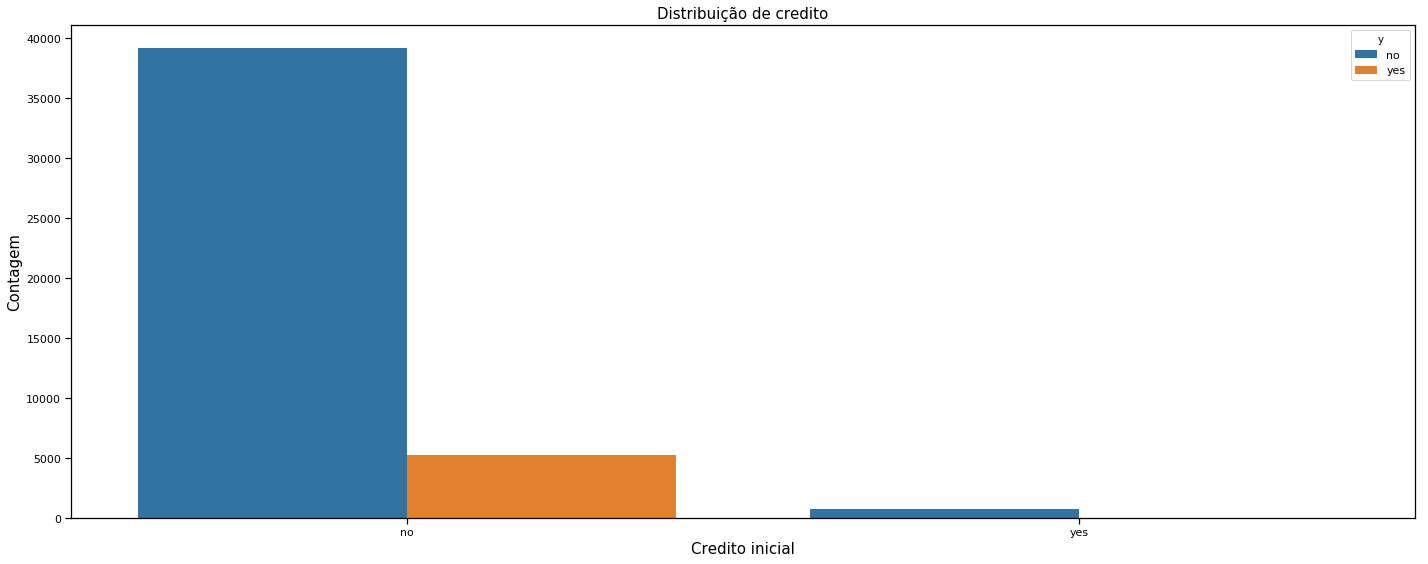

In [25]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'default', data = clientes, hue='y')
ax.set_xlabel('Credito inicial', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição de credito', fontsize=15)
plt.tight_layout()

Analisando o perfil de cliente que tem ou não casa

ValueError: Could not interpret input 'y'

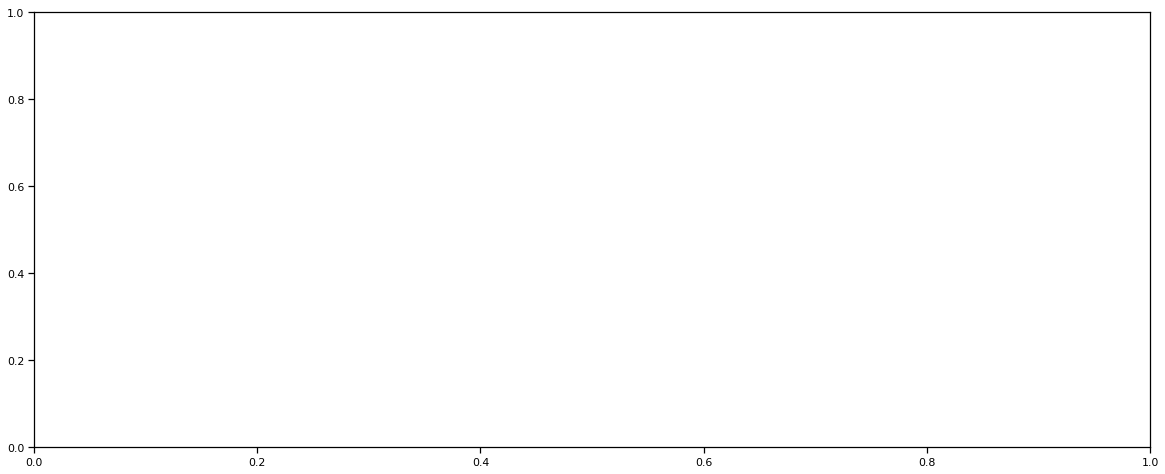

In [83]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'housing', data = clientes, hue='y')
ax.set_xlabel('Possui casa', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição imóvel', fontsize=15)
plt.tight_layout()

Analisando o perfil de clientes que já tem ou não emprestimo

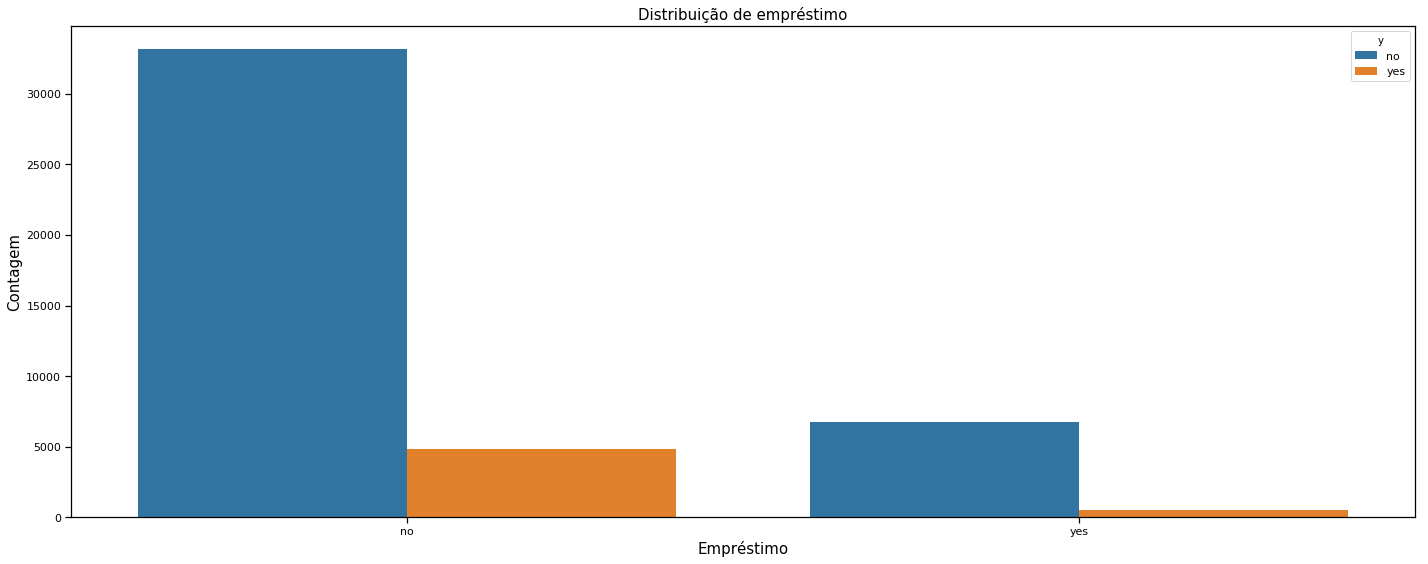

In [27]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'loan', data = clientes, hue='y')
ax.set_xlabel('Empréstimo', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição de empréstimo', fontsize=15)
plt.tight_layout()

Convertendo variáveis categóricas, presentes no DataFrame Clientes, para valores numéricos

In [28]:
from sklearn.preprocessing import LabelEncoder
enconder = LabelEncoder()

In [29]:
clientes['job']      = enconder.fit_transform(clientes['job']) 
clientes['marital']  = enconder.fit_transform(clientes['marital']) 
clientes['education']= enconder.fit_transform(clientes['education']) 
clientes['default']  = enconder.fit_transform(clientes['default']) 
clientes['housing']  = enconder.fit_transform(clientes['housing']) 
clientes['loan']     = enconder.fit_transform(clientes['loan']) 
clientes['y']        = enconder.fit_transform(clientes['y']) 

In [30]:
#Verificando se a conversão foi bem sucessida
print(clientes.head())

   age  job  marital  education  default  housing  loan  y
0   58    4        1          2        0        1     0  0
1   44    9        2          1        0        1     0  0
2   33    2        1          1        0        1     1  0
3   47    1        1          3        0        1     0  0
4   33   11        2          3        0        0     0  0


Criando grupo de clientes baseado em suas idades

Grupo 1: idade <= 30

Grupo 2: 30<idade<=50

Grupo 3: 50<idade<=70

Grupo 4: idade>70

In [31]:
def grupo_idade(dados):
    dados.loc[dados['age'] <= 30, 'age'] = 1
    dados.loc[(dados['age'] > 30) & (dados['age'] <= 50), 'age'] = 2
    dados.loc[(dados['age'] > 50) & (dados['age'] <= 70), 'age'] = 3
    dados.loc[dados['age'] > 70, 'age'] = 4
           
    return dados

In [32]:
clientes = grupo_idade(clientes)

In [33]:
#Verificando o DataFrame para verificar se o perfil da idade está correto
print(clientes.head())

   age  job  marital  education  default  housing  loan  y
0    3    4        1          2        0        1     0  0
1    2    9        2          1        0        1     0  0
2    2    2        1          1        0        1     1  0
3    2    1        1          3        0        1     0  0
4    2   11        2          3        0        0     0  0


Correlação dados dos clientes

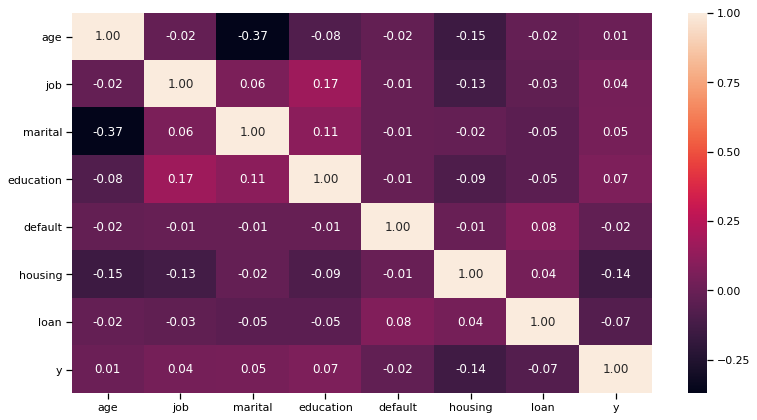

In [34]:
corr_clientes=clientes.corr()
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (13,7))
sns.heatmap(corr_clientes, annot = True, fmt = ".2f")

Analisando agora os dados relacionados ao contato com o cliente

In [35]:
colunas = ['contact','month','day','duration','y']
contato = bank[colunas]

In [36]:
print(contato.head())

   contact month  day  duration   y
0  unknown   may    5       261  no
1  unknown   may    5       151  no
2  unknown   may    5        76  no
3  unknown   may    5        92  no
4  unknown   may    5       198  no


Determinando os tipos de contato

In [37]:
tipo_contato = contato['contact'].unique()
print(tipo_contato)

['unknown' 'cellular' 'telephone']


Determinando os meses da campanha

In [38]:
mes_campanha = contato['month'].unique()
print(mes_campanha)

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


Determinando os dias da campanha

In [39]:
dia_campanha = contato['day'].unique()
print(dia_campanha)

[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]


Analisando a duração das chamadas

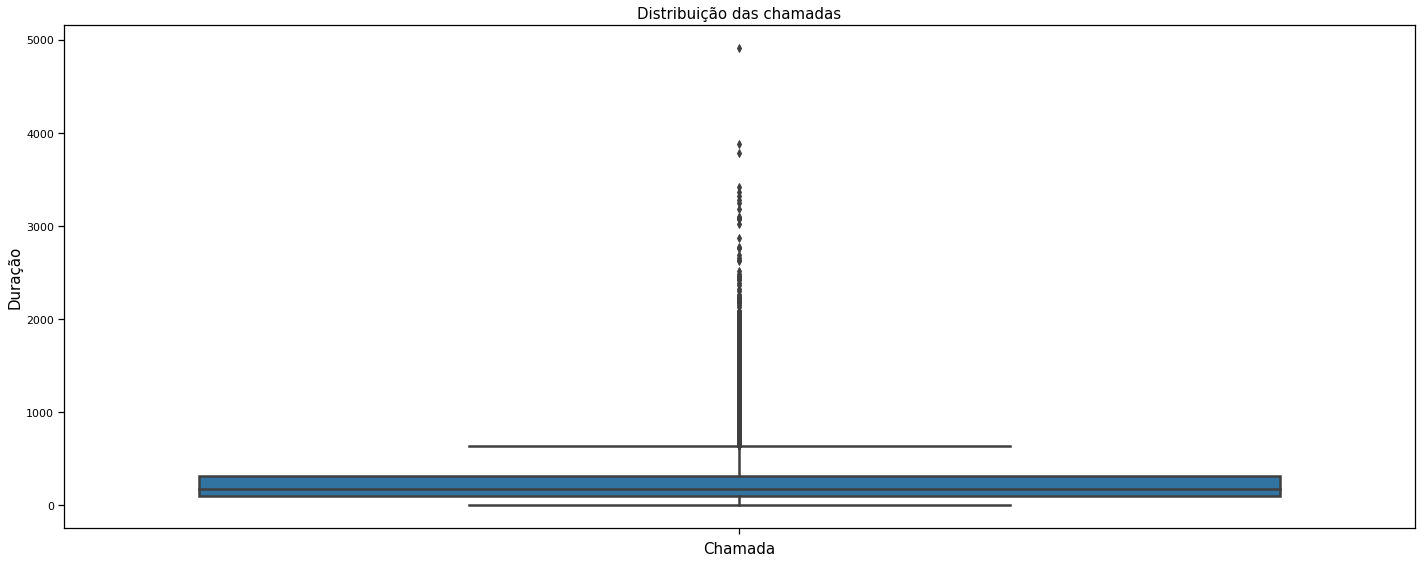

In [40]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.boxplot(x = 'duration', data = contato, hue='y', orient = 'v')
ax.set_xlabel('Chamada', fontsize=15)
ax.set_ylabel('Duração', fontsize=15)
ax.set_title('Distribuição das chamadas', fontsize=15)
plt.tight_layout()

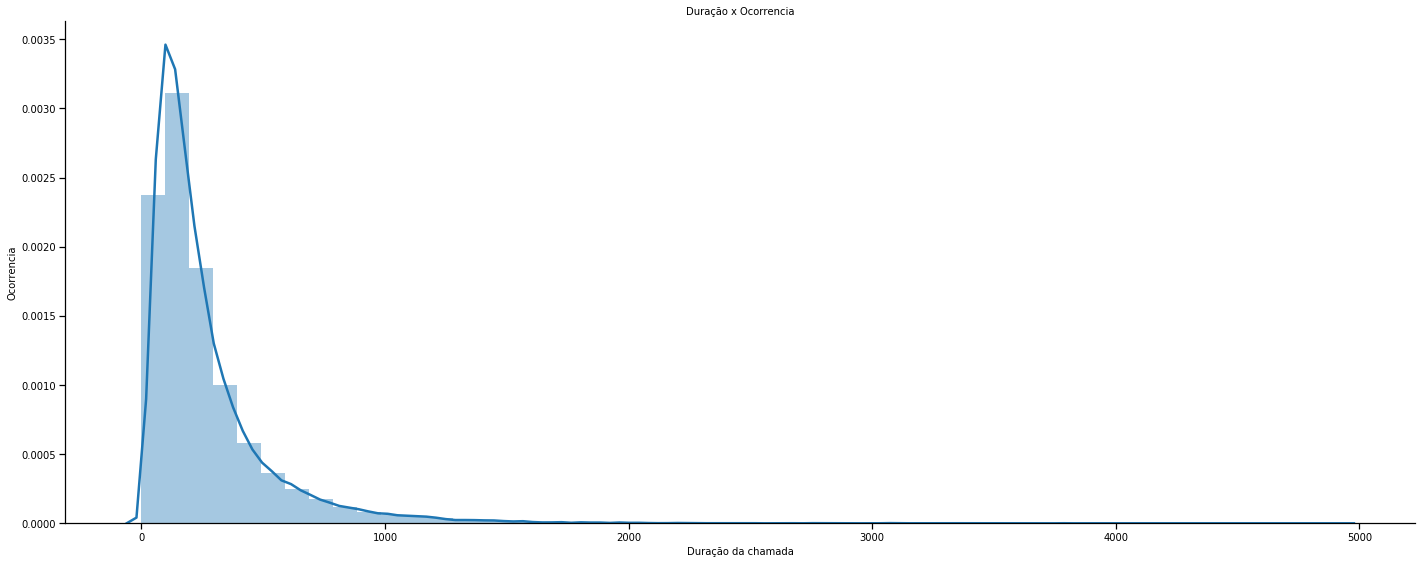

In [41]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.distplot(contato['duration'])
sns.despine(ax = ax)
ax.set_xlabel('Duração da chamada', fontsize=10)
ax.set_ylabel('Ocorrencia', fontsize=10)
ax.set_title('Duração x Ocorrencia', fontsize=10)
ax.tick_params(labelsize=10)
plt.tight_layout()

In [42]:
duracao_min = contato['duration'].min()/60.0
print("Duração mínima: {:0.1f} minutos".format(duracao_min))
duracao_max = contato['duration'].max()/60.0
print("Duração máxima: {:0.1f} minutos".format(duracao_max))
duracao_mean = contato['duration'].mean()/60.0
print("Duração média: {:0.1f} minutos".format(duracao_mean))
duracao_std = contato['duration'].std()/60.0
print("Duração std: {:0.1f} minutos".format(duracao_std))

Duração mínima: 0.0 minutos
Duração máxima: 82.0 minutos
Duração média: 4.3 minutos
Duração std: 4.3 minutos


In [43]:
q1c = contato['duration'].quantile(q = 0.25)/60.0
q2c = contato['duration'].quantile(q = 0.50)/60.0
q3c = contato['duration'].quantile(q = 0.75)/60.0
q4c = contato['duration'].quantile(q = 1.00)/60.0
outliers_c = q3c + 1.5*(q3c-q1c)
print("Primeiro quartil = {:0.1f}".format(q1c))
print("Segundo quartil = {:0.1f}".format(q2c))
print("Terceiro quartil = {:0.1f}".format(q3c))
print("Quarto quartil = {:0.1f}".format(q4c))
print("Outliers = {:0.1f}".format(outliers_c))

Primeiro quartil = 1.7
Segundo quartil = 3.0
Terceiro quartil = 5.3
Quarto quartil = 82.0
Outliers = 10.7


Chamadas com mais de 11.1 minutos são outliers

In [44]:
num_outliers_c = contato[contato['duration'] > outliers_c*60.0]['duration'].count()
print("Numero de outliers = {:0.0f}".format(num_outliers_c))
perc_num_outliers_c = 100.0*num_outliers_c/len(contato)
print("Numero de outliers = {:0.2f} %".format(perc_num_outliers_c))

Numero de outliers = 3247
Numero de outliers = 7.18 %


Verificando registros de chamadas não atendidas

In [45]:
chamadas_neg = contato[(contato['duration'] == 0)].count()
print(chamadas_neg)

contact     3
month       3
day         3
duration    3
y           3
dtype: int64


Distribuição dos contatos telefonicos

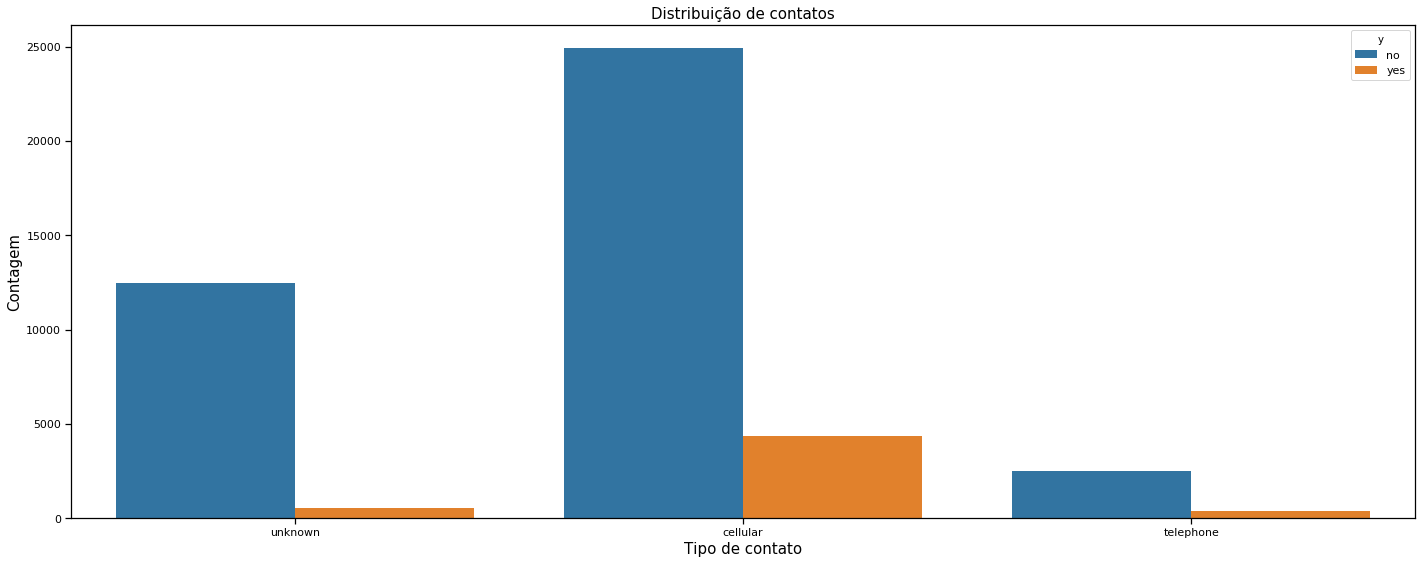

In [46]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'contact', data = contato, hue='y')
ax.set_xlabel('Tipo de contato', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição de contatos', fontsize=15)
plt.tight_layout()

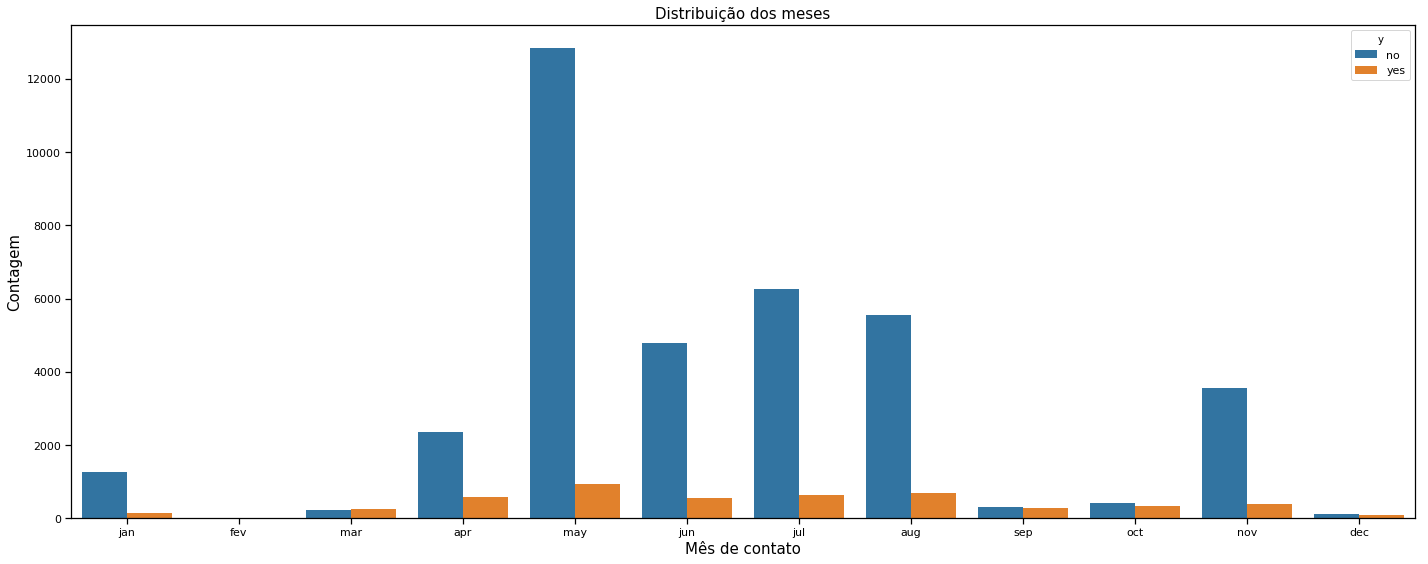

In [47]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'month', data = contato, hue='y', order = ['jan','fev','mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax.set_xlabel('Mês de contato', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição dos meses', fontsize=15)
plt.tight_layout()

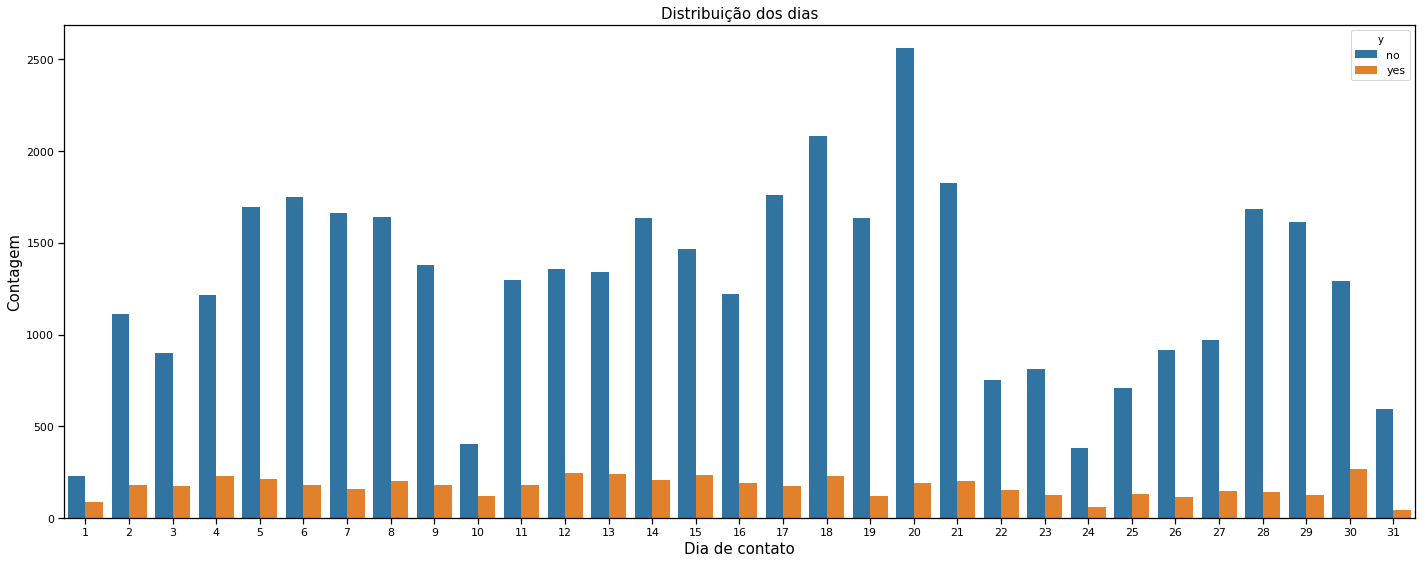

In [48]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'day', data = contato, hue='y', order = list(range(1,32)))
ax.set_xlabel('Dia de contato', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição dos dias', fontsize=15)
plt.tight_layout()

Criando grupo de contato baseado na duração da chamada

In [49]:
def grupo_duracao(duracao):
    duracao.loc[duracao['duration'] <= 120, 'duration'] = 1
    duracao.loc[(duracao['duration'] > 120) & (duracao['duration'] <= 180), 'duration'] = 2
    duracao.loc[(duracao['duration'] > 180) & (duracao['duration'] <= 300), 'duration'] = 3
    duracao.loc[(duracao['duration'] > 300) & (duracao['duration'] <= 600), 'duration'] = 4
    duracao.loc[duracao['duration'] > 600, 'duration'] = 5
           
    return duracao

In [50]:
contato = grupo_duracao(contato)

In [51]:
#Verificando se a conversão foi bem sucedida
print(contato.head())

   contact month  day  duration   y
0  unknown   may    5         3  no
1  unknown   may    5         2  no
2  unknown   may    5         1  no
3  unknown   may    5         1  no
4  unknown   may    5         3  no


Convertendo variáveis categóricas de contato para valores numéricos

In [52]:
from sklearn.preprocessing import LabelEncoder
enconder = LabelEncoder()

In [53]:
contato['contact'] = enconder.fit_transform(contato['contact']) 
contato['month'] = enconder.fit_transform(contato['month']) 
contato['y'] = enconder.fit_transform(contato['y']) 

In [54]:
#Verificando se a conversão foi bem sucessida
print(contato.head())

   contact  month  day  duration  y
0        2      8    5         3  0
1        2      8    5         2  0
2        2      8    5         1  0
3        2      8    5         1  0
4        2      8    5         3  0


Correlação contato

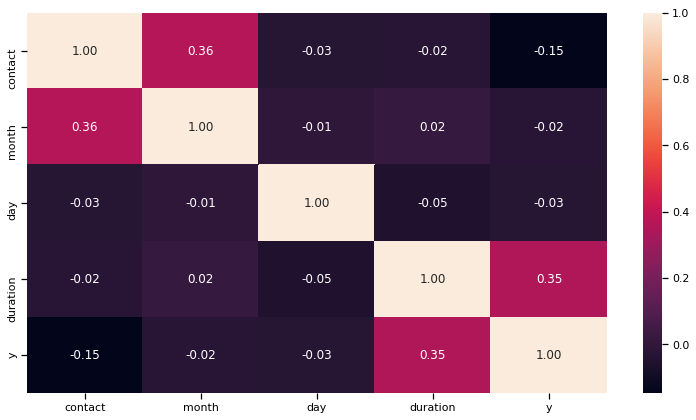

In [55]:
corr_contato=contato.corr()
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (13,7))
sns.heatmap(corr_contato, annot = True, fmt = ".2f")

Analisando os atributos da campanha

In [56]:
colunas_camp = ['campaign','pdays','previous','poutcome','y']
campanha = bank[colunas_camp]

In [57]:
print(campanha.head())

   campaign  pdays  previous poutcome   y
0         1     -1         0  unknown  no
1         1     -1         0  unknown  no
2         1     -1         0  unknown  no
3         1     -1         0  unknown  no
4         1     -1         0  unknown  no


Determinando os números de contatos

In [58]:
print(campanha['campaign'].unique())

[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]


Determinando o número de possiveis dias que se passaram

In [59]:
print(campanha['pdays'].unique())

[ -1 151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129 188
 196 172 118 119 104 171 117 164 132 131 123 159 186 111 115 116 173 178
 110 152  96 103 150 175 193 181 185 154 145 138 126 180 109 158 168  97
 182 127 130 194 125 105 102  26 179  28 183 155 112 120 137 124 187 190
 113 162 134 169 189   8 144 191 184 177   5  99 133  93  92  10 100 156
 198 106 153 146 128   7 121 160 107  90  27 197 136 139 122 157 149 135
  30 114  98 192 163  34  95 141  31 199  94 108  29 268 247 253 226 244
 239 245 204 231 238 258 230 254 265  71 223 246 250 266 240 205 261 259
 241 260 234 251 225 161 237 262 248 255 220 227 206 224 249 235 228 263
   2 270 232 252 207 200 269 233 256 273 272 242 264 208 214 222 271 203
 221 202 216 201 257 229 210 217  75 213  73  76 267 211 215  77 236  82
   6 209 274   1 243 212 275  80 276   9 279  12 280  88 277  85  84 219
  24  21 282  41 294  49 329 307 303 331 308 300  64 314 287 330 332 302
 323 318 333  60 326 335 313 312 305 325 327 336 30

Determinando o número de contatos antes da campanha

In [60]:
print(campanha['previous'].unique())

[  0   3   1   4   2  11  16   6   5  10  12   7  18   9  21   8  14  15
  26  37  13  25  20  27  17  23  38  29  24  51 275  22  19  30  58  28
  32  40  55  35  41]


Determinando os resultados da última campanha

In [61]:
print(campanha['poutcome'].unique())

['unknown' 'failure' 'other' 'success']


Graficando distribuição anterior

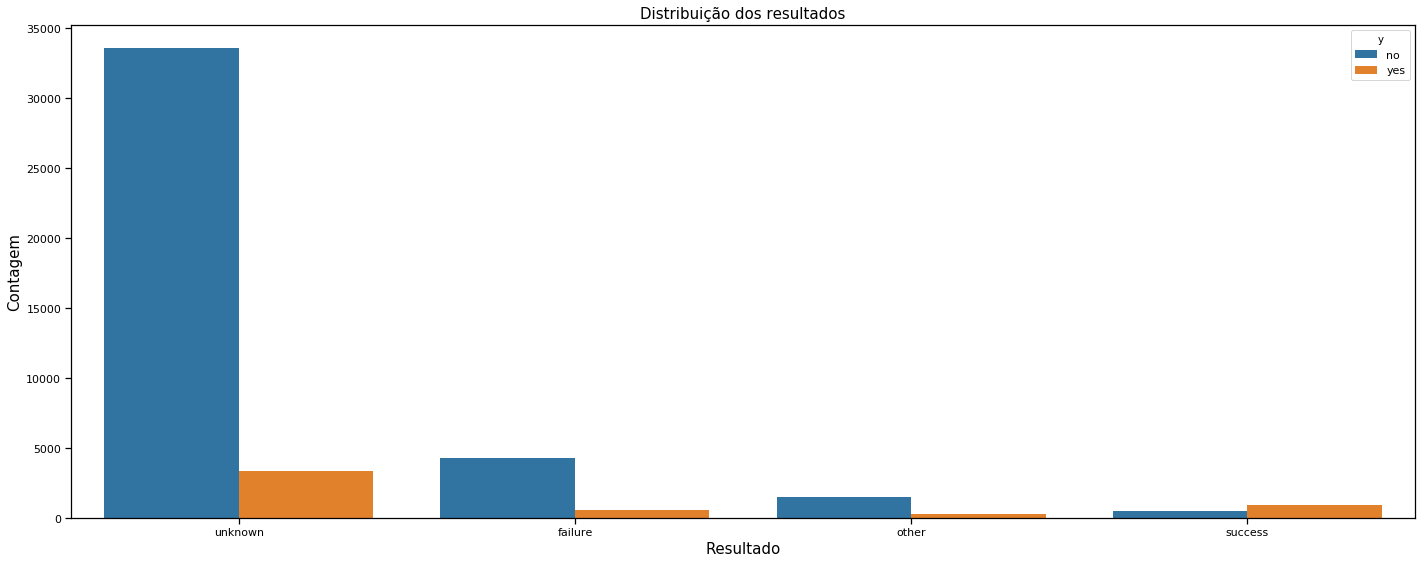

In [62]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'poutcome', data = campanha, hue='y')
ax.set_xlabel('Resultado', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição dos resultados', fontsize=15)
plt.tight_layout()

Convertendo variaveis categórias da campanha para valores numéricos

In [63]:
from sklearn.preprocessing import LabelEncoder
enconder = LabelEncoder()

In [64]:
campanha['poutcome'] = enconder.fit_transform(campanha['poutcome']) 
campanha['y'] = enconder.fit_transform(campanha['y']) 

In [65]:
#Verificando se a conversão foi bem sucedida
print(campanha.head())

   campaign  pdays  previous  poutcome  y
0         1     -1         0         3  0
1         1     -1         0         3  0
2         1     -1         0         3  0
3         1     -1         0         3  0
4         1     -1         0         3  0


Correlação campanha

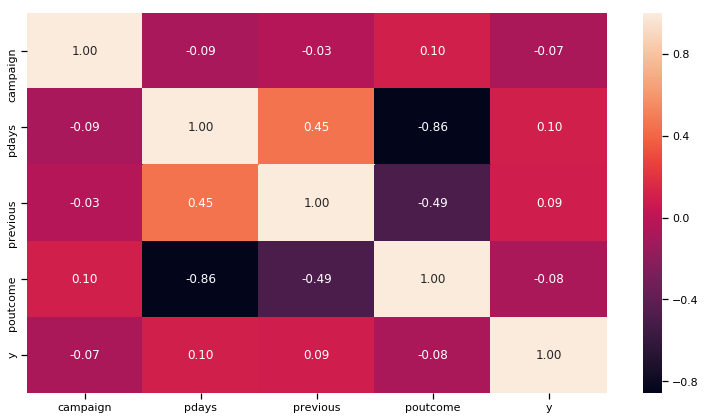

In [66]:
corr_campanha=campanha.corr()
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (13,7))
sns.heatmap(corr_campanha, annot = True, fmt = ".2f")

Isolando a variável do resultado final

In [67]:
resultado = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)

Removendo a coluna do resultado de todos os DataFrames

In [68]:
campanha = campanha.drop('y',axis=1)
print(campanha.head())

   campaign  pdays  previous  poutcome
0         1     -1         0         3
1         1     -1         0         3
2         1     -1         0         3
3         1     -1         0         3
4         1     -1         0         3


In [69]:
contato = contato.drop('y',axis=1)
print(contato.head())

   contact  month  day  duration
0        2      8    5         3
1        2      8    5         2
2        2      8    5         1
3        2      8    5         1
4        2      8    5         3


In [70]:
clientes = clientes.drop('y',axis=1)
print(clientes.head())

   age  job  marital  education  default  housing  loan
0    3    4        1          2        0        1     0
1    2    9        2          1        0        1     0
2    2    2        1          1        0        1     1
3    2    1        1          3        0        1     0
4    2   11        2          3        0        0     0


Concatenando os DataFrames

In [71]:
banco = pd.concat([clientes,contato,campanha], axis = 1)

In [72]:
print(banco.head())

   age  job  marital  education  default  housing  loan  contact  month  day  \
0    3    4        1          2        0        1     0        2      8    5   
1    2    9        2          1        0        1     0        2      8    5   
2    2    2        1          1        0        1     1        2      8    5   
3    2    1        1          3        0        1     0        2      8    5   
4    2   11        2          3        0        0     0        2      8    5   

   duration  campaign  pdays  previous  poutcome  
0         3         1     -1         0         3  
1         2         1     -1         0         3  
2         1         1     -1         0         3  
3         1         1     -1         0         3  
4         3         1     -1         0         3  


Separando numa amostra de treino e teste

In [73]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(banco, resultado, test_size = 0.25, random_state = 101)

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_treino = sc.fit_transform(X_treino)
X_teste = sc.transform(X_teste)

Importanto bibliotecas para determinar melhor modelo de previsão

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

Utilizando modelo de regressão logistica

In [76]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() 
logreg.fit(X_treino,y_treino)
logpred = logreg.predict(X_teste)

Exibindo matriz de confusão para o modelo de regressão logística

In [77]:
matriz_logreg = confusion_matrix(y_teste, logpred)
print(matriz_logreg)

[[9769  176]
 [1079  279]]


Determinando a acurácia do modelo de regressão logística

In [78]:
acc_logreg = accuracy_score(y_teste, logpred)*100
print("Acurácia Regressão Logística = {:0.2f}%".format(acc_logreg))

Acurácia Regressão Logística = 88.90%


Validação cruzada Regressão logística

In [79]:
cv_logreg = (cross_val_score(logreg, X_treino, y_treino, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("Cross-Validation = {:0.2f}%".format(cv_logreg*100))

Cross-Validation = 88.87%


Utilizando modelo KNN para previsão

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
#número de vizinhos
vizinhos = np.arange(0,35)

In [82]:
#Lista vazina para armazenar notas da validação cruzada
notas_cv = []
for k in vizinhos:
    valor_k = k+1
    knn = KNeighborsClassifier(n_neighbors = valor_k, weights='uniform', p=3, metric='minkowski')
    kfold = KFold(n_splits=10, random_state=123)
    notas = cross_val_score(knn, X_treino, y_treino, cv=kfold, scoring='accuracy')
    notas_cv.append(notas.mean()*100)
    print("vizinhos=%d %0.2f (+/- %0.2f)" % (valor_k, notas.mean()*100, notas.std()*100))

vizinhos=1 86.70 (+/- 0.70)
vizinhos=2 88.96 (+/- 0.77)
vizinhos=3 88.49 (+/- 0.71)
vizinhos=4 89.03 (+/- 0.70)
vizinhos=5 88.97 (+/- 0.75)
vizinhos=6 89.08 (+/- 0.77)
vizinhos=7 89.04 (+/- 0.76)
vizinhos=8 89.10 (+/- 0.75)
vizinhos=9 89.17 (+/- 0.72)
vizinhos=10 89.16 (+/- 0.72)
vizinhos=11 89.13 (+/- 0.76)
vizinhos=12 89.15 (+/- 0.74)
vizinhos=13 89.16 (+/- 0.76)
vizinhos=14 89.16 (+/- 0.74)
vizinhos=15 89.21 (+/- 0.72)
vizinhos=16 89.21 (+/- 0.69)
vizinhos=17 89.19 (+/- 0.70)
vizinhos=18 89.24 (+/- 0.61)
vizinhos=19 89.22 (+/- 0.67)
vizinhos=20 89.20 (+/- 0.65)
vizinhos=21 89.19 (+/- 0.69)
vizinhos=22 89.22 (+/- 0.63)
vizinhos=23 89.19 (+/- 0.65)
vizinhos=24 89.20 (+/- 0.70)
vizinhos=25 89.25 (+/- 0.72)
vizinhos=26 89.17 (+/- 0.70)
vizinhos=27 89.21 (+/- 0.69)
vizinhos=28 89.15 (+/- 0.65)
vizinhos=29 89.14 (+/- 0.63)
vizinhos=30 89.19 (+/- 0.65)
vizinhos=31 89.18 (+/- 0.67)
vizinhos=32 89.17 (+/- 0.62)
vizinhos=33 89.16 (+/- 0.65)
vizinhos=34 89.10 (+/- 0.66)
vizinhos=35 89.11 (+/- 

In [84]:
#Determinando melhor valor de vizinhos
melhor_k = vizinhos[notas_cv.index(max(notas_cv))] + 1
print(melhor_k)

25


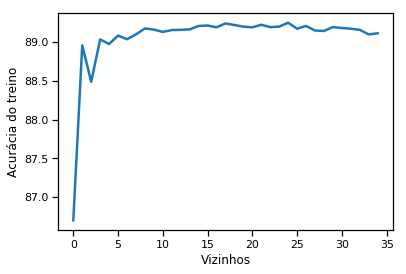

In [85]:
plt.plot(vizinhos, notas_cv)
plt.xlabel('Vizinhos')
plt.ylabel('Acurácia do treino')
plt.show()

Utilizando modelo KNN com n=9

In [86]:
knn = KNeighborsClassifier(n_neighbors=melhor_k, weights='uniform', p=3, metric='minkowski')
knn.fit(X_treino, y_treino)
knn_pred = knn.predict(X_teste)

Matriz de confusão do modelo KNN

In [87]:
matriz_knn = confusion_matrix(y_teste, knn_pred)
print(matriz_knn)

[[9832  113]
 [1135  223]]


Validação cruzada KNN

In [88]:
cv_knn = (cross_val_score(knn, X_treino, y_treino, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("Cross-Validation = {:0.2f}%".format(cv_knn*100))

Cross-Validation = 89.16%


Utilizando modelo SVC para previsão

In [89]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_treino, y_treino)
svc_pred = svc.predict(X_teste)

Matriz de confusão do modelo SVC

In [90]:
matriz_svc = confusion_matrix(y_teste, svc_pred)
print(matriz_svc)

[[9001  944]
 [1002  356]]


Validação utilizando SVC

In [91]:
cv_svc = (cross_val_score(svc, X_treino, y_treino, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("Cross-Validation = {:0.2f}%".format(cv_svc*100))

Cross-Validation = 83.09%


Utilizando modelo DecisionTreeClassifier (DTE) para previsão

In [92]:
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(criterion='entropy') #criterion = entopy, gini
dte.fit(X_treino, y_treino)
dte_pred = dte.predict(X_teste)

Matriz de confusão do modelo DTE

In [93]:
matriz_dte = confusion_matrix(y_teste, dte_pred)
print(matriz_dte)

[[9228  717]
 [ 682  676]]


Validação utilizando DTE

In [94]:
cv_dte = (cross_val_score(dte, X_treino, y_treino, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("Cross-Validation = {:0.2f}%".format(cv_dte*100))

Cross-Validation = 87.68%


Utilizando modelo RandomForestClassifier (RFC) para previsão

In [95]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 250,criterion='gini')#criterion = entopy,gini
rfc.fit(X_treino, y_treino)
rfc_pred = rfc.predict(X_teste)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Matriz de confusão do modelo RFC

In [96]:
matriz_rfc = confusion_matrix(y_teste, rfc_pred)
print(matriz_rfc)

[[9613  332]
 [ 776  582]]


Validação utilizando RFC

In [97]:
cv_rfc = (cross_val_score(rfc, X_treino, y_treino, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("Cross-Validation = {:0.2f}%".format(cv_rfc*100))

Cross-Validation = 89.75%


Utilizando modelo GaussianNB (GNB) para previsão

In [98]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(X_treino, y_treino)
gnb_pred = gnb.predict(X_teste)

Matriz de confusão do modelo GNB

In [99]:
matriz_gnb = confusion_matrix(y_teste, gnb_pred)
print(matriz_gnb)

[[8646 1299]
 [ 613  745]]


Validação utilizando GNB

In [100]:
cv_gnb = (cross_val_score(gnb, X_treino, y_treino, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("Cross-Validation = {:0.2f}%".format(cv_gnb*100))

Cross-Validation = 82.87%


Utilizando modelo XGBClassifier (XGB) para previsão

In [101]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_treino, y_treino)
xgb_pred = xgb.predict(X_teste)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Matriz de confusão do modelo XGB

In [102]:
matriz_xgb = confusion_matrix(y_teste, xgb_pred)
print(matriz_xgb)

[[9760  185]
 [ 906  452]]


Validação utilizando XGB

In [103]:
cv_xgb = (cross_val_score(xgb, X_treino, y_treino, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("Cross-Validation = {:0.2f}%".format(cv_xgb*100))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

Cross-Validation = 90.07%


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Utilizando modelo GradientBoostingClassifier (GBC) para previsão

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_treino, y_treino)
gbc_pred = gbc.predict(X_teste)

Matriz de confusão do modelo GBC

In [105]:
matriz_gbc = confusion_matrix(y_teste, gbc_pred)
print(matriz_gbc)

[[9732  213]
 [ 865  493]]


Validação utilizando GBC

In [106]:
cv_gbc = (cross_val_score(gbc, X_treino, y_treino, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("Cross-Validation = {:0.2f}%".format(cv_gbc*100))

Cross-Validation = 90.13%


Armazenando resultados num DataFrame

In [107]:
modelos = pd.DataFrame({'Modelos': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
                'Score':  [cv_rfc, cv_dte, cv_svc, cv_knn, cv_logreg, cv_gnb, cv_xgb, cv_gbc]})

In [108]:
modelos.sort_values(by='Score', ascending=False)

,Modelos,Score
7,Gradient Boosting,0.901321
6,XGBoost,0.900673
0,Random Forest Classifier,0.897487
3,K-Near Neighbors,0.891560
4,Logistic Model,0.888729
1,Decision Tree Classifier,0.876843
2,Support Vector Machine,0.830896
5,Gausian NB,0.828713


# Relatório

Os dados mostram que os clientes tem idade entre 18 e 95 anos, com uma idade média de 40.9 anos e um desvio padrão de 10.6 anos. Da distribuição de idades, verificou-se que clientes com mais de 73 anos são considerados outliers, o que corresponde a 1.08% dos clientes. 

Os clientes que trabalham como blue-collar são os que mais recusaram as propostas de empréstimo, enquanto que os que ocupam posição de gerenciamento aceitam mais propostas. Os clientes casados, receberam e aceitaram mais propostas de empréstimos o que sugere que clientes casados tem mais responsabilidade. Os clientes que possuem apenas ensino médio receberam mais propostas e este mesmo grupo junto com os que possuem ensino superior aceitaram mais empréstimos, indicando que clientes com ensino médio e superior são um bom alvo para ligações. 

Clientes que não possuíam crédito inicial receberam mais propostas e também tiveram um maior índice de aceitação e já a grande maioria dos que possuíam crédito inicial recusaram a oferta. Clientes que possuem imóvel receberam mais propostas, porém os que não possuem aceitaram mais as ofertas. Os clientes que já haviam feito um empréstimo anteriormente aceitaram menos propostas em relação aos que não tinham empréstimo anterior e o grupo dos clientes sem empréstimo anterior é um alvo melhor.

As chamadas telefónicas tiveram uma duração média de 4.3 minutos e um desvio padrão de 4.3 minutos. A chamada com maior duração teve 82.0 minutos. Chamadas com duração superior a 10.7 minutos são outliers. Os clientes que receberam ligações em seus celulares aceitaram mais propostas. 

O mês de maio foi o que mais teve propostas porém juntamente com o mês de agosto foram os que tiveram mais aceitações porém os dados nos mostram que agosto é o melhor mês para se ligar para o cliente, sendo que a ligação deve ocorrer preferencialmente no inicio da segunda metade do mês. 

Os clientes que não se sabe se aderiram a empréstimo na campanha anterior aceitaram mais propostas e nota-se que houve um aumento de aceitação daqueles que haviam recusado a proposta anterior. 

Utilizou-se diferentes modelos de classificação para prever se um cliente irá ou não fazer um empréstimo e de todos estes modelos o Gradiente Boosting apresentou melhor performance junto o modelo XGBoost. 
